In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# learners
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier

# embeddings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocessing
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import classification_report

# pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Question 1

- Create a dataframe by reading the file `eng.csv`. You can find the .csv file under "files" on Canvas. (We suggest you take a sample of the data, for example with 1,000, 10,000 or 20,000 instances, to save computing time.) 

- Use value_counts to see the counts for each value of the column, `emotion`. 

We will create models to predict emotions based on texts. Assign the `text` column to X and the `emotion` column to y.

In [11]:
# Loading dataset
df = pd.read_csv("eng.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282313 entries, 0 to 282312
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      282313 non-null  object
 1   emotion   282313 non-null  object
 2   language  282313 non-null  object
dtypes: object(3)
memory usage: 6.5+ MB


In [12]:
df["emotion"].value_counts()

anticipation    115000
joy             110446
sadness          36905
anger            16726
fear              3236
Name: emotion, dtype: int64

In [13]:
# Creating feature variable X and target variable y 
X = df['text']
y = df['emotion']

# Question 2

## 2.1 Train-test split
- Perform a train test split and then fit_transform a `Countvectorizer` on X_train and transform X_test.

In [14]:
# Creating train-test split
(
    X_train,
    X_test,
    y_train,
    y_test
) = train_test_split(
    X,
    y,
    stratify=y,
    shuffle=True,
    random_state=1
)

In [15]:
# Vectorizer. Using countvectorizer to turn text into features
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

## 2.2 Plotting top N tokens
Use the function below to plot the N most frequent tokens

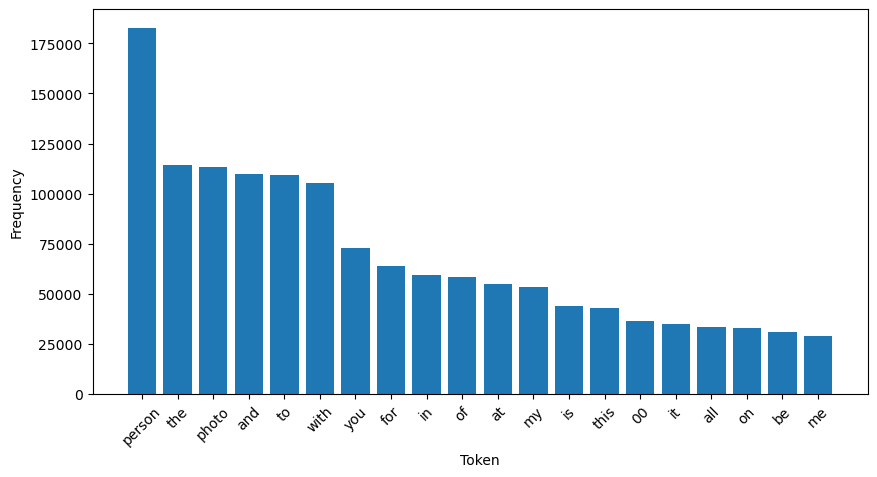

In [17]:
N = 20

def top_n_tokens(X, cv, N, plot=True):
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    top_words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:N]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.bar([w[0] for w in top_words_freq], [w[1] for w in top_words_freq])
        plt.xticks(rotation=45)
        plt.xlabel('Token')
        plt.ylabel('Frequency')
        plt.show()
    else:
        return top_words_freq
    
top_n_tokens(X_train_cv, cv, N)


# Question 3

- Build one or more classifiers. 
- Report the accuracy score for vectorized train and test data.
- Print a classification report for model performance on vectorized test data

In [18]:
## Print target variable:
y_train

16820              joy
147303    anticipation
177253    anticipation
40779          sadness
10876     anticipation
              ...     
115883             joy
237329    anticipation
281534             joy
260297    anticipation
39779     anticipation
Name: emotion, Length: 211734, dtype: object

## 3.1 Logistic Regression

In [19]:
# Creating a Logistic Regression classifier object
lr = LogisticRegression(solver='lbfgs', max_iter=5000)

# Train the classifier using the training data
lr.fit(X_train_cv, y_train)

LogisticRegression(max_iter=5000)

In [20]:
# Calculate and print the logistic regression score for the training set
lr_score = lr.score(X_train_cv, y_train)
print("Train", lr_score)

# Calculate and print the logistic regression score for the testing set
lr_score = lr.score(X_test_cv, y_test)
print("Test", lr_score)

Train 0.8092087241538912
Test 0.6382493376216721


In [21]:
# Use the logistic regression model to predict the target values for the testing set
y_pred = lr.predict(X_test_cv)

# Print the classification report comparing the predicted target values to the true target values for the testing set
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.66      0.48      0.55      4182
anticipation       0.66      0.67      0.67     28750
        fear       0.68      0.28      0.40       809
         joy       0.61      0.66      0.63     27612
     sadness       0.67      0.56      0.61      9226

    accuracy                           0.64     70579
   macro avg       0.66      0.53      0.57     70579
weighted avg       0.64      0.64      0.64     70579



## 3.1 SGDClassifier

In [22]:
# Create a stochastic gradient descent classifier with the 'modified_huber' loss function and a maximum of 5000 iterations
sgd = SGDClassifier(loss='modified_huber', max_iter=5000)

# Fit the classifier to the training data
sgd.fit(X_train_cv, y_train)

# Calculate and print the classifier score for the training set
sgd_score = sgd.score(X_train_cv, y_train)
print("Train", sgd_score)

# Calculate and print the classifier score for the testing set
sgd_score = sgd.score(X_test_cv, y_test)
print("Test", sgd_score)

# Use the classifier to predict the target values for the testing set, then print a classification report comparing the predicted target values to the true target values
y_pred = sgd.predict(X_test_cv)
print(classification_report(y_test, y_pred))

Train 0.7507910869298271
Test 0.6380368098159509
              precision    recall  f1-score   support

       anger       0.65      0.48      0.55      4182
anticipation       0.66      0.66      0.66     28750
        fear       0.77      0.23      0.35       809
         joy       0.60      0.68      0.64     27612
     sadness       0.67      0.55      0.60      9226

    accuracy                           0.64     70579
   macro avg       0.67      0.52      0.56     70579
weighted avg       0.64      0.64      0.64     70579



## Question 4
In the above model(s), we used unigrams (single words) only. This is the default for count_vectorizer. 

- Try with unigrams and bigrams, and also unigrams, bigrams and trigrams.  
You do this by setting ngram_range for `CountVectorizer`. 

- Build a logistic regression model for each of these settings and report on the results.

In [18]:
# CAN BE BUILD IN MANY WAYS, BUT CONSIDER THE OUTPUT BELOW AS INSPIRATION

Running n-grams: (1, 1)
Running n-grams: (1, 2)
Running n-grams: (1, 3)
Running n-grams: (2, 3)


,ngrams,vocabulary_size,LogisticRegression_train,LogisticRegression_test,SGDClassifier_train,SGDClassifier_test,mean_train
2,"(1, 3)",331933,0.995,0.567,0.992,0.538,0.994
1,"(1, 2)",144976,0.993,0.563,0.993,0.539,0.993
3,"(2, 3)",308858,0.991,0.512,0.992,0.489,0.992
0,"(1, 1)",23075,0.939,0.541,0.973,0.515,0.956


In [23]:
# Define a function that performs an experiment with n-grams and two models.
def ngram_experiment(data, count_vect, ngram_range, model1, model2):
    
    # Initialize an empty list to store the experiment results.
    results = []
    
    # Get the names of the two models.
    model1_name = model1.__class__.__name__
    model2_name = model2.__class__.__name__
    
    # Loop through each n-gram range.
    for ngrams in ngram_range:
        print("Running n-grams:", ngrams)
        
        # Set the n-gram range.
        count_vect.ngram_range = ngrams
        
        # Transform the training data.
        X_train_cv = count_vect.fit_transform(data["X_train"])
        
        # Fit both models to the training data.
        model1.fit(X_train_cv, data["y_train"])
        model2.fit(X_train_cv, data["y_train"])

        # Transform the test data.
        X_test_cv = count_vect.transform(data["X_test"])

        # Store the results of the experiment for the current n-gram range.
        results.append(
            {
                "ngrams": ngrams,
                "vocabulary_size": len(count_vect.vocabulary_),
                f"{model1_name}_train": model1.score(X_train_cv, data["y_train"]).round(3),
                f"{model1_name}_test": model1.score(X_test_cv, data["y_test"]).round(3),
                f"{model2_name}_train": model2.score(X_train_cv, data["y_train"]).round(3),
                f"{model2_name}_test": model2.score(X_test_cv, data["y_test"]).round(3),
            }
        )
    
    # Return a DataFrame containing the experiment results, sorted by mean_train in descending order.
    return (
        pd.DataFrame(results)
        .assign(
            mean_train=lambda x: x[[f"{model1_name}_train", f"{model2_name}_train"]].mean(axis=1).round(3),
        )
        .sort_values("mean_train", ascending=False)
    )
# Running ngram_experiment
ngram_experiment(
    data={
        "X_train": X_train,
        "y_train": y_train,
        "X_test": X_test,
        "y_test": y_test,
    },
    count_vect=cv,
    ngram_range=[(1, 1), (1, 2), (1, 3), (2, 3)],
    model1=lr,
    model2=sgd,
)

Running n-grams: (1, 1)
Running n-grams: (1, 2)
Running n-grams: (1, 3)


<h2>Question 5</h2>

- Use dummy classifier with the default settings (most frequent class), and the uniform strategy (random guessing). 

- Select the `CountVectorizer` with the optimal `nram_range`. Use the vectorized version of the data from this model.
- Print the train and test results for each dummy classifier, to determine some baselines for comparison.

## 5.1 Dummy Classifier

In [22]:
# Create a CountVectorizer object with an ngram range of 1 to 3
cv = CountVectorizer(ngram_range=(1, 3))

# Transform the training data into a document-term matrix using the CountVectorizer object, then assign it to the variable X_train_cv
X_train_cv = cv.fit_transform(X_train)

# Transform the testing data into a document-term matrix using the CountVectorizer object, then assign it to the variable X_test_cv
X_test_cv = cv.transform(X_test)


In [ ]:
# Create a dummy classifier object
dummy = DummyClassifier()

# Train the dummy classifier on the training data
dummy.fit(X_train_cv, y_train)

# Calculate and print the classifier score (accuracy) for the training set
print("Train", dummy.score(X_train_cv, y_train))

# Calculate and print the classifier score (accuracy) for the testing set
print("Test", dummy.score(X_test_cv, y_test))


In [ ]:
# Set the strategy of a dummy classifier to a uniform distribution over classes
dummy.strategy = "uniform"

# Fit the dummy classifier on the feature data for the training set (`X_train_cv`) and corresponding target values (`y_train`)
dummy.fit(X_train_cv, y_train)

# Calculate and print the accuracy score of the dummy classifier on the training set and testing set respectively
print("Train", dummy.score(X_train_cv, y_train))
print("Test", dummy.score(X_test_cv, y_test))


# Question 6

- Use the `TfidfTransformer`, to create Term Frequency - Inverse Document Frequency (tfidf) scores instead of frequency scores. 
- You can apply the `TfidfTransformer` on the vectors created by `CountVectorizer`, using the fit_transform method just as is done with `CountVectorizer`. 
- Create a logistic regression model with the data produced by `TfidfTransformer`, and report the scores on train and test.

- **TIP**: Instead of calculating frequencies with `CountVectorizer` and *then* calculating TF-IDF scores from said frequencies, you can import and call `TfidfVectorizer` directly, with the same syntax as you used for `CountVectorizer`

## 6.1 TFIDF Transformer

In [25]:
# Create a TF-IDF vectorizer object
tf_idf = TfidfVectorizer(ngram_range=(1, 3), stop_words="english")

# Use the TF-IDF vectorizer object to transform the training feature data into a matrix of TF-IDF features
X_train_tfidf = tf_idf.fit_transform(X_train)

# Use the previously fit TF-IDF vectorizer object to transform the testing feature data into a matrix of TF-IDF features
X_test_tfidf = tf_idf.transform(X_test)


In [ ]:
# plot top 20 tokens
top_n_tokens(X_train_tfidf, tf_idf, N=30)

## 6.2 Logistic Regression

In [ ]:
# Create a logistic regression object with the 'lbfgs' solver, 'auto' multi-class classification, a random state of 0, and a maximum of 5000 iterations
lr = LogisticRegression(solver='lbfgs', multi_class='auto',random_state=0, max_iter=5_000)

# Fit the logistic regression model to the training data
lr.fit(X_train_tfidf, y_train)

# Calculate and print the classifier score for the training set
lr_score = lr.score(X_train_tfidf, y_train)
print("Train", lr_score)

# Calculate and print the classifier score for the testing set
lr_score = lr.score(X_test_tfidf, y_test)
print("Test", lr_score)


In [ ]:
# Use the logistic regression classifier object (lr) to predict target values for the test set features transformed by the tf-idf vectorizer object (X_test_tfidf) and store them in preds
preds = lr.predict(X_test_tfidf)

# Use the classification_report function to generate a report comparing the predicted target values (preds) to the true target values (y_test) for the test set, and print the report to the console
print(classification_report(y_test, preds))


<h2>Question 7</h2>


- Create a Scikit-Learn `Pipeline`, consisting of `CountVectorizer`, `TfidfTransformer`, and `LogisticRegression`. 

- Apply the pipeline to the training data, just as in the previous question, and report results on train and test.

In [ ]:
# Create a pipeline that applies TfidfVectorizer to the input data followed by a logistic regression classifier with a maximum of 5000 iterations
pipe = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("clf", LogisticRegression(max_iter=5000))
    ],
    verbose=True
)

# Fit the pipeline to the training data
pipe.fit(X_train,y_train)

# Calculate and print the accuracy score of the pipeline on the training and testing data
print("Train", pipe.score(X_train, y_train))
print("Test", pipe.score(X_test, y_test))


<h2>Question 8</h2>

- Use the above pipeline with GridSearchCV. 

**Hint** You can use the following choices for parameters: 
- for CountVectorizer, use ngram ranges of (1,1), (1,2), and (1,3). 
- For TfidfTransformer set the *use_idf* parameter to `True` or `False`. Print the best score and best parameter choices.

In [ ]:
params = { 
    "tfidf__ngram_range": ((1,1), (1,2), (1,3)),
    "tfidf__stop_words": (None, "english"),
    "tfidf__min_df": (0.1, 1),
    "tfidf__max_df": (0.5, 0.75, 1),
    "clf__penalty": ("l1", "l2"),
    "clf__solver": ("liblinear", "saga", "lbfgs"),
  }
grid_search = GridSearchCV(pipe, params, n_jobs=-1, verbose=1,cv=3)
grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best score: {grid_search.best_score_:.3f}")
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print("Train", grid_search.score(X_train, y_train))
print("Test", grid_search.score(X_test, y_test))

In [ ]:
param_char = {
    "tfidf__ngram_range": ((4,7), (5, 8)),
    "tfidf__analyzer": ["char"],
    "tfidf__min_df": (0.05, 0.1, 1),
    "tfidf__max_df": (0.75, 1),
    "clf__solver": ("liblinear", "lbfgs"),

  }
grid_search = GridSearchCV(pipe, param_char, n_jobs=-2, verbose=1,cv=3)
grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best score: {grid_search.best_score_:.3f}")
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_char.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print("Train", grid_search.score(X_train, y_train))
print("Test", grid_search.score(X_test, y_test))

<h2>Question 9</h2>
Use classification report with the best model resulting from grid_search in the previous two questions.

In [ ]:
# Print classificaiton report
print(classification_report(y_test, grid_search.predict(X_test), zero_division=0))

## Bonus: Question 10
Let's go back to question 1 and convert the problem to a binary classification problem. 

- Map ("joy", "anticipation") to "positive" and ("anger", "fear", "sadness") to "negative" (Use the snippet below)

- Then copy/paste the experiments above here, and run them again with this new scope. 
- Report what your new baseline is and comment on the effect of changing the scope.

In [ ]:
df["emotion"] = df["emotion"].replace(
    {
        "joy": "positive",
        "anticipation": "positive",
        "anger": "negative",
        "fear": "negative",
        "sadness": "negative"
    }
)